In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('dataset/stock_data.csv')

In [18]:
data.head(10)

,Date,High,Low,Open,Close,Volume,Adj Close,Company Name
0,2010-01-04,93.750000,92.012497,93.562500,92.775002,1632148.0,73.478745,HCL
1,2010-01-05,95.250000,92.637497,93.125000,94.862503,5037896.0,75.132080,HCL
2,2010-01-06,95.724998,91.250000,95.025002,92.000000,3992320.0,72.864944,HCL
3,2010-01-07,92.974998,89.800003,92.974998,90.037498,3665940.0,71.310638,HCL
4,2010-01-08,90.750000,87.312500,90.750000,87.937500,6241492.0,69.647415,HCL
5,2010-01-11,90.375000,87.949997,87.949997,88.812500,5742332.0,70.340424,HCL
6,2010-01-12,93.449997,88.750000,89.250000,91.962502,9051468.0,72.835266,HCL
7,2010-01-13,94.750000,90.025002,91.962502,94.487503,8064504.0,74.835060,HCL
8,2010-01-14,95.937500,91.400002,94.974998,92.525002,7763244.0,73.280762,HCL
9,2010-01-15,93.474998,91.537498,92.875000,92.349998,2749332.0,73.142151,HCL


In [ ]:
data.info()

In [ ]:
data.describe()

In [38]:
data.isnull().sum()

Date            0
High            0
Low             0
Open            0
Close           0
Volume          0
Adj Close       0
Company Name    0
dtype: int64

In [ ]:
print("Shape: ",data.shape)

In [26]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.head()

In [ ]:
data['Company Name'].value_counts()

In [ ]:
figure1 = px.line(data, x='Date', y='Close', width=900, height=600, title='Variation in closing price', color='Company Name')
figure1.write_image('EDA_images/ClosingPrice.png')
figure1.show()

In [ ]:
figure2 = px.line(data, x='Date', y='Open', width=900, height=600, title='Variation in Opening price', color='Company Name')
figure2.write_image('EDA_images/OpeningPrice.png')
figure2.show()

In [ ]:
figure3 = px.line(data, x='Date', y='Volume', width=900, height=600, title='Variation in Volume', color='Company Name')
figure3.write_image('EDA_images/Volume.png')
figure3.show()

In [9]:
hcl = data[data['Company Name']=='HCL'].groupby("Date").sum()
mnm = data[data['Company Name']=='M&M'].groupby("Date").sum()
tatamotors = data[data['Company Name']=='TATAMOTORS'].groupby("Date").sum()
hdfcbank = data[data['Company Name']=='HDFCBANK'].groupby("Date").sum()
reliance = data[data['Company Name']=='RELIANCE'].groupby("Date").sum()

In [10]:
hcl['Daily_Percentage_Change']=hcl['Close'].pct_change()*100
mrf.dropna(axis = 0, inplace = True)

mnm['Daily_Percentage_Change']=mnm['Close'].pct_change()*100
mnm.dropna(axis = 0, inplace = True)

tatamotors['Daily_Percentage_Change']=tatamotors['Close'].pct_change()*100
tatamotors.dropna(axis = 0, inplace = True)

hdfcbank['Daily_Percentage_Change']=hdfcbank['Close'].pct_change()*100
hdfcbank.dropna(axis = 0, inplace = True)

reliance['Daily_Percentage_Change']=reliance['Close'].pct_change()*100
reliance.dropna(axis = 0, inplace = True)

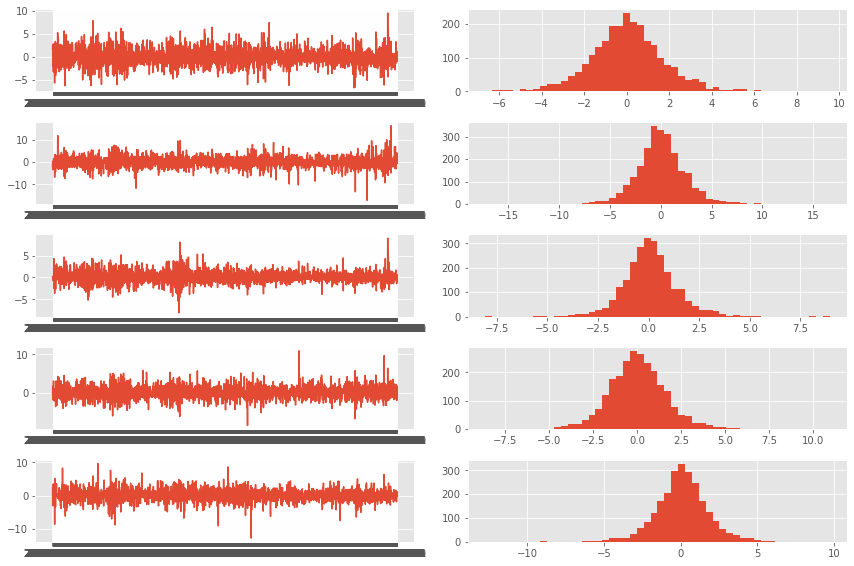

In [73]:
fig = plt.figure(figsize= (12,8))
ax = fig.subplots(5, 2)
ax[0][0].plot(mnm['Daily_Percentage_Change'])
ax[0][1].hist(mnm['Daily_Percentage_Change'], bins = 50) 

ax[1][0].plot(tatamotors['Daily_Percentage_Change'])
ax[1][1].hist(tatamotors['Daily_Percentage_Change'], bins = 50) 

ax[2][0].plot(hdfcbank['Daily_Percentage_Change'])
ax[2][1].hist(hdfcbank['Daily_Percentage_Change'], bins = 50) 

ax[3][0].plot(reliance['Daily_Percentage_Change'])
ax[3][1].hist(reliance['Daily_Percentage_Change'], bins = 50) 

ax[4][0].plot(hcl['Daily_Percentage_Change'])
ax[4][1].hist(hcl['Daily_Percentage_Change'], bins = 50) 

fig.tight_layout(pad = 1.2)


In [65]:
def avgAnnualPrice(df,color):
    cmpName = data["Company Name"].unique()[0]
    #df = data.reset_index()
    df.drop(["Adj Close"], axis=1)
    yearList = data["Date"].dt.year.unique()
    resultDf = df.groupby(df["Date"].dt.year)["Close"].mean()
    f = plt.figure(figsize=(12,8))
    plt.bar(resultDf.keys(), resultDf.values,color = color)
    plt.xlabel("Years")
    plt.ylabel("Annual Average Closing Price")
    plt.title("Annual Avg Price of " + cmpName)
    plt.show()

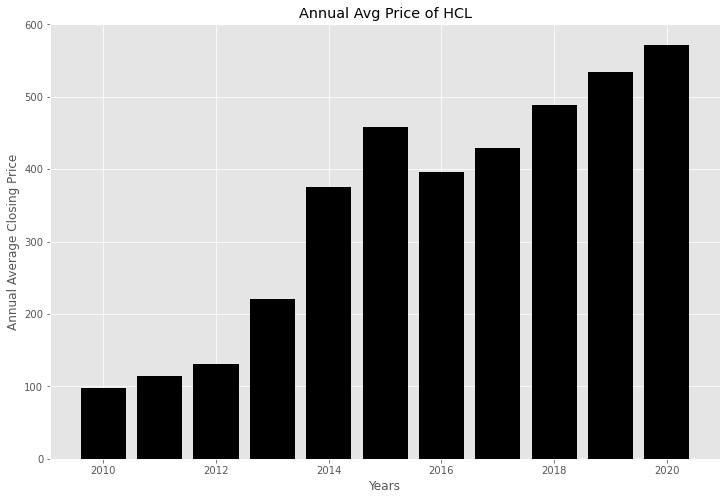

In [66]:
avgAnnualPrice(data[data['Company Name']=='HCL'],'Black')

In [71]:
def annualPercentageIncrease(df,color):
    perIncrease = []
    cmpName = df["Company Name"].unique()[0]
    #df = data.reset_index()
    df.drop(["Adj Close"], axis=1)
    yearList = ["2010-11", "2011-12", "2012-13", "2013-14", "2014-15", "2015-16", "2016-17", "2017-18", "2018-19", "2019-20"]
    resultDf = df.groupby(df["Date"].dt.year)["Close"].mean()
    for i in range(10):
        per = round((resultDf.iloc[i+1] - resultDf.iloc[i]) / resultDf.iloc[i] * 100,2)
        perIncrease.append(per)

    f = plt.figure(figsize=(12,8))
    bars = plt.bar(yearList, perIncrease, color=color)
    plt.bar_label(bars, padding=5, fmt='%g')
    plt.margins(x = .1 , y = 0.1)
    plt.xlabel("Years")
    plt.ylabel("Percentage Increase")
    plt.title("Percentage increase in succesive years of " + cmpName)
      
    plt.show()

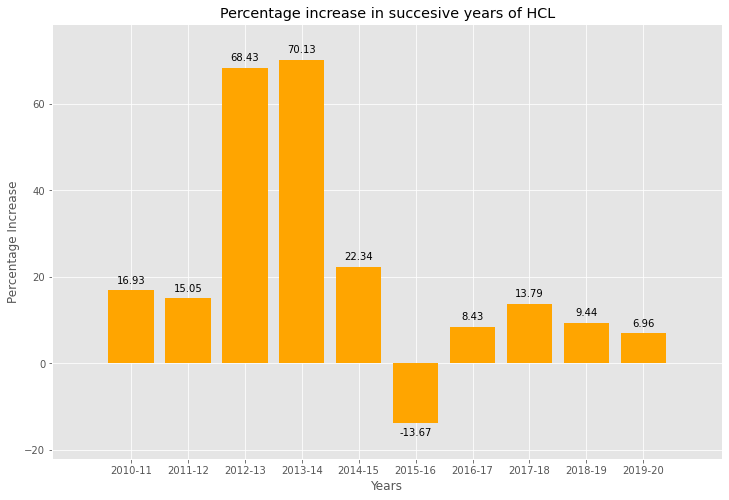

In [72]:
annualPercentageIncrease(data[data['Company Name']=='HCL'],'Orange')